<a href="https://colab.research.google.com/github/Gurudevasura/Erode-Cancer-Patients-Prediction-/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
cancer_data = pd.read_csv('/content/taluk_patients_16-20 .csv')

In [3]:
# print first 5 rows in the dataframe
cancer_data.head()

,Block,Area,Treated,Cancer_People,Total_Population,PH level
0,1,Anthiyur,196999,6369,350755,8.5
1,2,Bhavani,225937,4446,459517,6.3
2,3,Erode,828143,46851,822329,5.2
3,4,Gobichettipalayam,341189,13652,376351,8.3
4,5,Kavundapadi,122160,1481,167248,7.5


In [4]:
# getting some basic informations about the data
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Block             9 non-null      int64  
 1   Area              9 non-null      object 
 2   Treated           9 non-null      int64  
 3   Cancer_People     9 non-null      int64  
 4   Total_Population  9 non-null      int64  
 5   PH level          9 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 560.0+ bytes


In [5]:
# checking the number of missing values
cancer_data.isnull().sum()

Block               0
Area                0
Treated             0
Cancer_People       0
Total_Population    0
PH level            0
dtype: int64

In [6]:
# getting the statistical measures of the data
cancer_data.describe()

,Block,Treated,Cancer_People,Total_Population,PH level
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.000000,252260.666667,9301.666667,322689.888889,7.200000
std,2.738613,231443.083123,14617.741224,220962.651171,1.468843
min,1.000000,45455.000000,208.000000,120592.000000,4.800000
25%,3.000000,122160.000000,1734.000000,167248.000000,6.300000
50%,5.000000,196999.000000,4446.000000,266106.000000,7.500000
75%,7.000000,225937.000000,6369.000000,376351.000000,8.300000
max,9.000000,828143.000000,46851.000000,822329.000000,8.900000


Correlation

In [7]:
correlation = cancer_data.corr()

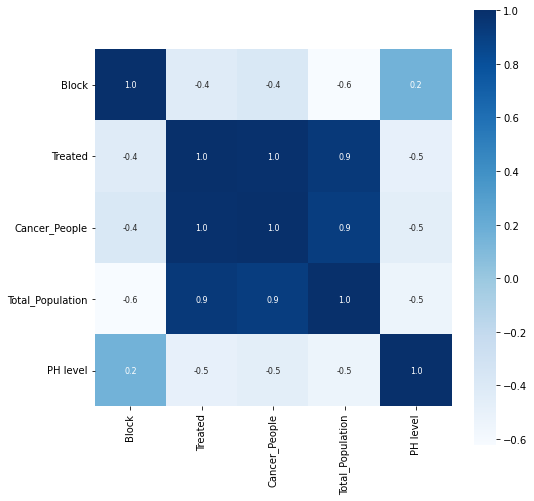

In [8]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
# correlation values of cancer people
print(correlation['Cancer_People'])

Block              -0.376268
Treated             0.989716
Cancer_People       1.000000
Total_Population    0.911317
PH level           -0.454958
Name: Cancer_People, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


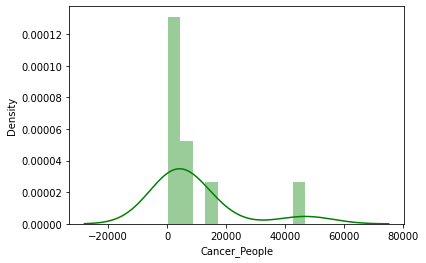

In [10]:
# checking the distribution of the Cancer_People
sns.distplot(cancer_data['Cancer_People'],color='green')

In [11]:
X = cancer_data.drop(['Block','Cancer_People','Area'],axis=1)
Y = cancer_data['Cancer_People']

In [12]:
print(X)

   Treated  Total_Population  PH level
0   196999            350755       8.5
1   225937            459517       6.3
2   828143            822329       5.2
3   341189            376351       8.3
4   122160            167248       7.5
5   118454            125205       7.2
6   170478            266106       4.8
7   221531            216106       8.1
8    45455            120592       8.9


In [13]:
print(Y)

0     6369
1     4446
2    46851
3    13652
4     1481
5     1734
6     3823
7     5151
8      208
Name: Cancer_People, dtype: int64


Splitting into Training data and Test Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [17]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[2393.92 8404.96]


In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

Compare the Present people and Predicted people  in a Plot

In [20]:
Y_test = list(Y_test)

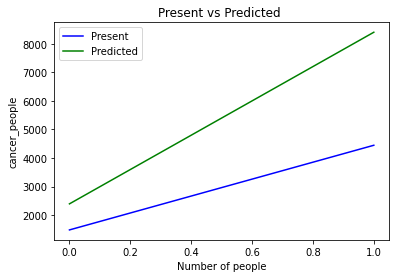

In [21]:
plt.plot(Y_test, color='blue', label = 'Present')
plt.plot(test_data_prediction, color='green', label='Predicted')
plt.title('Present vs Predicted')
plt.xlabel('Number of people')
plt.ylabel('cancer_people')
plt.legend()
plt.show()